In [ ]:
!pip install hvplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 4.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [ ]:
# Загрузка набора данных
df = pd.read_csv("/content/Real Estate Dataset.csv")

# Просмотр основной информации о фрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   number                               414 non-null    int64  
 1   transaction date                     414 non-null    float64
 2   house age                            414 non-null    float64
 3   distance to the nearest MRT station  414 non-null    float64
 4   number of convenience stores         414 non-null    int64  
 5   latitude                             414 non-null    float64
 6   longitude                            414 non-null    float64
 7   house price of unit area             414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
df.shape

(414, 8)

In [ ]:
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats

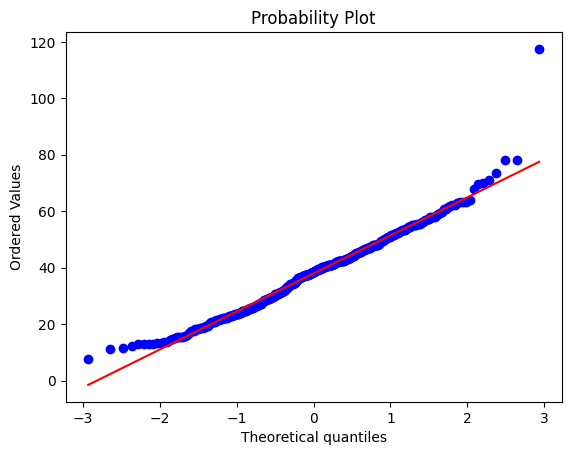

In [ ]:
Y_label = 'house price of unit area'

#QQ-Plot
stats.probplot(df[Y_label], dist='norm', plot=py)
py.show()

<Axes: >

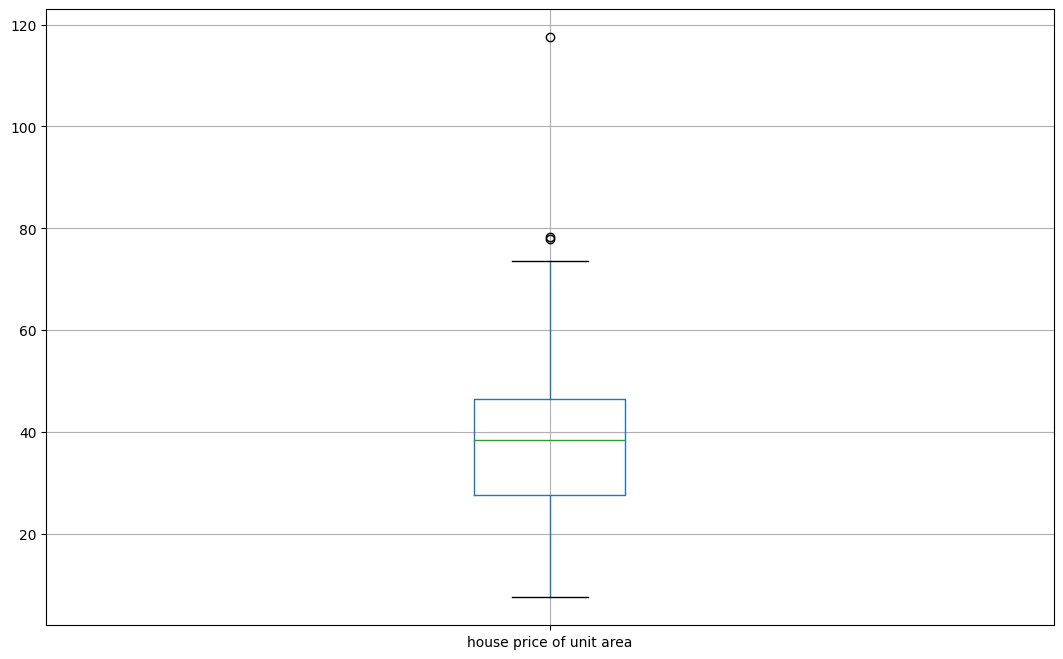

In [ ]:
df[[Y_label]].boxplot(figsize=(13, 8))

In [ ]:
# Определяем Q1 и Q2
Q1 =df[Y_label].quantile(0.25)
Q3 =df[Y_label].quantile(0.75)
print(Q1)
print(Q3)

27.7
46.6


In [ ]:
# Определим IQR
IQR =  Q3 - Q1
IQR

18.900000000000002

In [ ]:
# Находим нижнюю и верхнюю границу
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

-0.6500000000000021
74.95


In [ ]:
# Определение вбыоросов
df[(df[Y_label]<lower_bound) | (df[Y_label]>upper_bound)]

,number,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
220,221,2013.333,37.2,186.5101,9,24.97703,121.54265,78.3
270,271,2013.333,10.8,252.5822,1,24.97460,121.53046,117.5
312,313,2013.583,35.4,318.5292,9,24.97071,121.54069,78.0


In [ ]:
df = df[~((df[Y_label] < (lower_bound)) |(df[Y_label] > (upper_bound)))]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 411 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   number                               411 non-null    int64  
 1   transaction date                     411 non-null    float64
 2   house age                            411 non-null    float64
 3   distance to the nearest MRT station  411 non-null    float64
 4   number of convenience stores         411 non-null    int64  
 5   latitude                             411 non-null    float64
 6   longitude                            411 non-null    float64
 7   house price of unit area             411 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 28.9 KB


<Axes: >

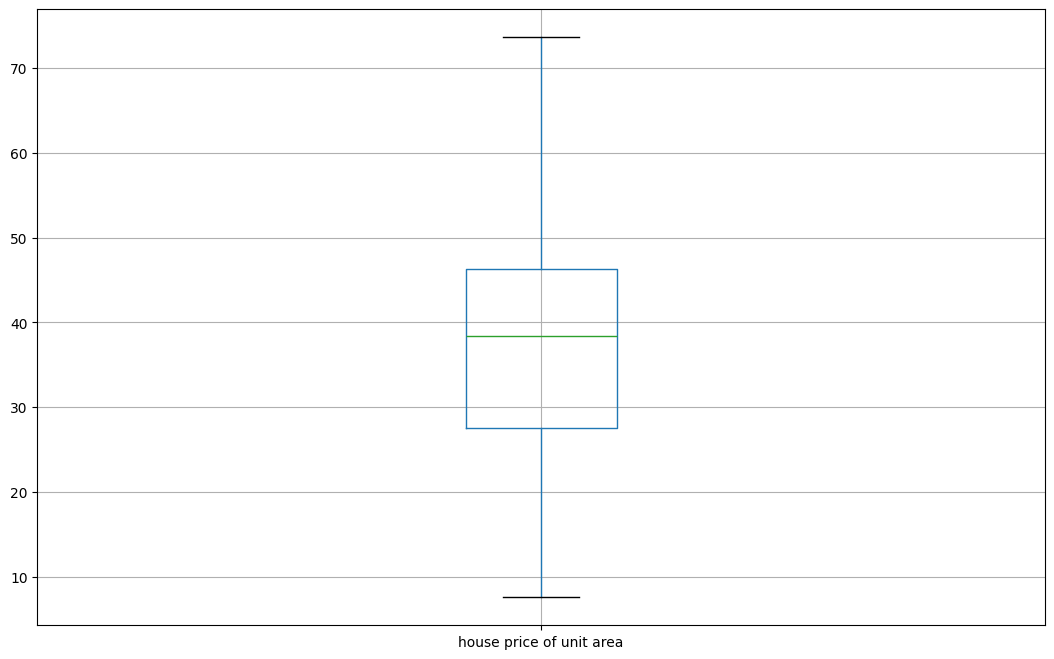

In [ ]:
df[[Y_label]].boxplot(figsize=(13, 8))

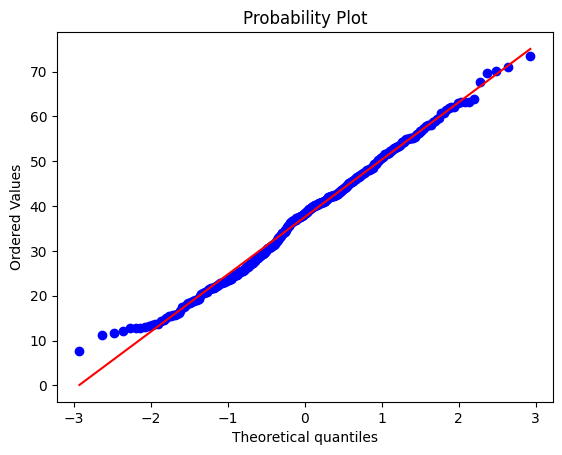

In [ ]:
#QQ-Plot
stats.probplot(df[Y_label], dist='norm', plot=py)
py.show()

In [ ]:
df = df.drop('number', axis=1)
df = df.drop('transaction date', axis=1)

In [ ]:
# Вычисление корреляции между столбцами фрейма данных
df.corr()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
house age,1.000000,0.030167,0.035385,0.052285,-0.053527,-0.242852
distance to the nearest MRT station,0.030167,1.000000,-0.604710,-0.590426,-0.806768,-0.701349
number of convenience stores,0.035385,-0.604710,1.000000,0.446079,0.448211,0.605853
latitude,0.052285,-0.590426,0.446079,1.000000,0.412657,0.571849
longitude,-0.053527,-0.806768,0.448211,0.412657,1.000000,0.554585
house price of unit area,-0.242852,-0.701349,0.605853,0.571849,0.554585,1.000000


<Axes: >

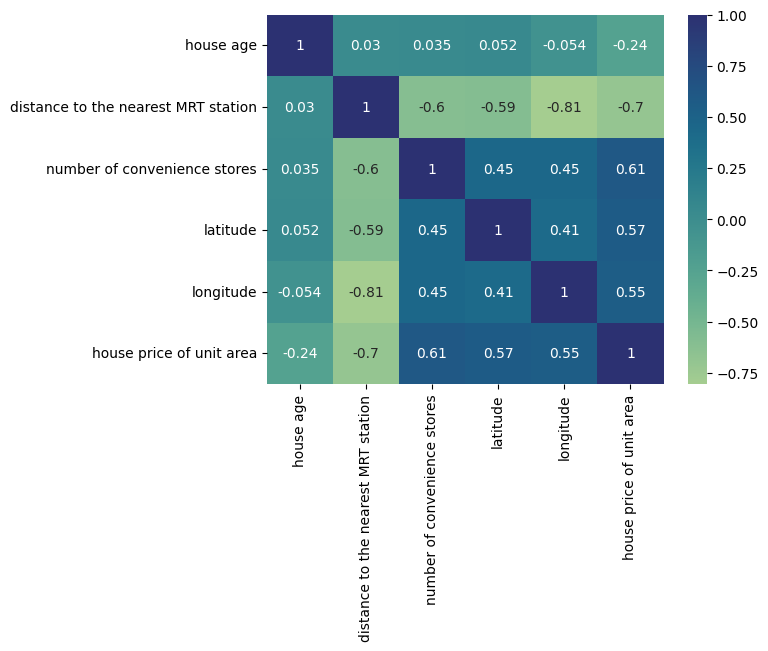

In [ ]:
# Вывод тепловой карты корреляций между столбцами
sns.heatmap(df.corr(), annot=True, cmap='crest')

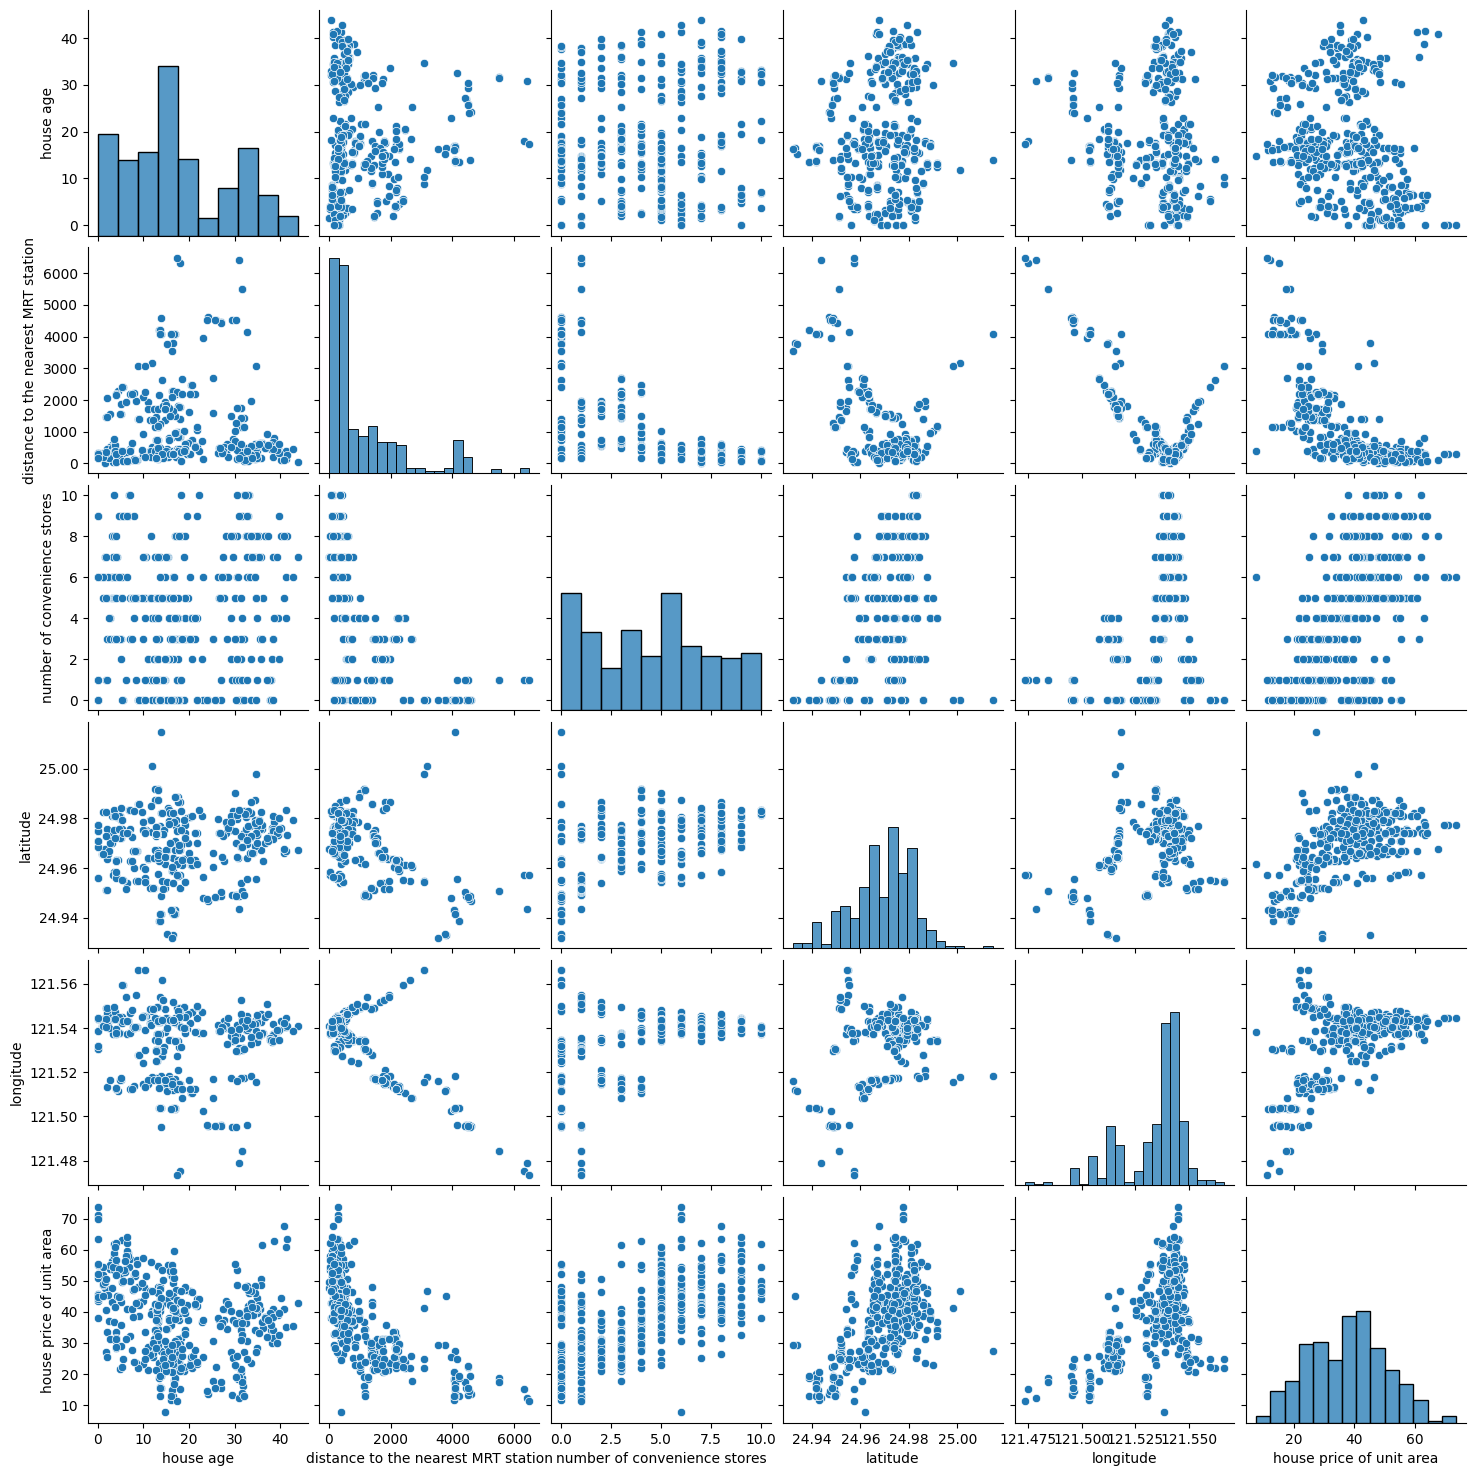

In [ ]:
# Построение диаграмм рассеяния
sns.pairplot(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 411 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   house age                            411 non-null    float64
 1   distance to the nearest MRT station  411 non-null    float64
 2   number of convenience stores         411 non-null    int64  
 3   latitude                             411 non-null    float64
 4   longitude                            411 non-null    float64
 5   house price of unit area             411 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 22.5 KB


# Многомерная линейная регрессия

In [ ]:
# Задача: определить, как цена на недвижимость зависит от расстояния до ближайшей станции метро

Y_label = "house price of unit area"
X_label = ["distance to the nearest MRT station", "number of convenience stores"]

X = df[X_label]
y = df[Y_label]

In [ ]:
X.shape

(411, 2)

In [ ]:
y.shape

(411,)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 411 entries, 0 to 413
Data columns (total 2 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   distance to the nearest MRT station  411 non-null    float64
 1   number of convenience stores         411 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 9.6 KB


In [ ]:
# Делим датасет на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=101
)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
X_train.shape

(287, 2)

In [ ]:
y_train.shape

(287,)

In [ ]:
# Создание модели линейной регрессии
linear = LinearRegression()

# Обучение модели
linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Точность предсказания модели
linear.score(X_test, y_test)

0.5846019219268382

In [ ]:
# Получение оценки R^2
r_sq = r2_score(y_test, linear.predict(X_test))
r_sq

0.5846019219268382

In [ ]:
# Получение параметров
linear.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
# b0 - модель предсказывает ответ 38.224385702158386 при x1 = x2 = 0
linear.intercept_

38.224385702158386

In [ ]:
# b1 - предсказанный ответ возрастает на -0.00726932 при x, увеличенным на 1
# b1 - предсказанный ответ возрастает на -0.00532503 при x,
linear.coef_

array([-0.00532503,  1.31427103])

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
linear.predict([[0, 0]])

array([38.2243857])

In [ ]:
linear.predict([[1, 1]])

array([39.5333317])

In [ ]:
linear.predict([[1, 1]]) - linear.predict([[0, 0]])

array([1.308946])

In [ ]:
pd.DataFrame(linear.coef_, X.to_frame().columns, columns=['Coefficient'])

AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [ ]:
# Предсказание цены на недвижимость по числу лет недвижимости
y_pred = linear.predict(X_test)

# Вывод 10-ти предсказанных цен
pd.DataFrame({'Test': y_test,'Pred':y_pred }).head(10)

In [ ]:
plt.scatter(y_test, y_pred, color='#8541EB', label='Предсказанные значения')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Линия наилучшего соответствия')

plt.xlabel('Y Test')
plt.ylabel('Y Pred')
plt.legend()

plt.show()

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Тестовые значения")
plt.plot(x_ax, y_pred, label="Предсказанные значения")
plt.title("Тестовые и предсказанные значения")

plt.xlabel('X')
plt.ylabel('Y')

plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
# Вычисляем регрессионные метрики
MAE  = metrics.mean_absolute_error(y_test, y_pred)
MSE  = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

In [ ]:
# Средняя цена на недвижимость
df[Y_label].mean()

In [ ]:
# Вычисляем разницу между тестовыми значениями и предсказанными
test_diff = (y_test - y_pred)

# Строим диаграмму ошибок
pd.DataFrame({'Error Values': (test_diff)}).hvplot.kde()

In [ ]:
sns.scatterplot(x=y_test, y=test_diff)
plt.axhline(y=0, color='r', ls='--')

In [ ]:
sns.displot(test_diff, bins=25, kde=True)

# Метод выявления аномалий

In [ ]:
!pip install pyod

In [ ]:
from pyod.utils.data import generate_data, get_outliers_inliers
from pyod.models.pca import PCA
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

In [ ]:
Y_label = "house price of unit area"
X_label = "distance to the nearest MRT station"

X = df[X_label]
y = df[Y_label]

df_train = pd.DataFrame(X)
df_train[Y_label] = y

In [ ]:
sns.scatterplot(x=X_label, y=Y_label, hue=Y_label, data=df_train, palette="hls")
plt.title('Зависимость цены от расстояния до станции')

In [ ]:
# Создание модели PCA (метод главных компонент)
clf = PCA()

In [ ]:
X_train = X.to_numpy().reshape(-1, 1)

# Тренировка PCA модели
clf.fit(X_train)

In [ ]:
# Предсказанные значения и оценки аномалий методом главных компонент
y_train_pred = clf.labels_
y_train_scores = clf.decision_scores_

In [ ]:
y_train_pred

In [ ]:
y_train_scores

In [ ]:
ax = sns.scatterplot(x=X_label, y=Y_label, hue=y_train_scores, data=df_train, palette="RdBu_r")

legend_labels = [f"{score:.2f}" for score in np.unique(y_train_scores)]
ax.legend(title="Оценка аномалии", labels=legend_labels)
plt.title('Оценки аномалий по методу PCA')

In [ ]:
df

In [ ]:
location = df.iloc[:, [3, 4]].values

In [ ]:
# Визуализация местоположения недвижимости
plt.scatter(location[:,0], location[:,1], marker = "x", color = 'purple', s = 60)

plt.xlabel('latitude')
plt.ylabel('longitude')

plt.show()

In [ ]:
# Поиск оптимального числа кластеров с помощью локтевого метода
from sklearn.cluster import KMeans

wcss = []
target_range = range(1, 11)

for i in target_range:
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=0)
  kmeans.fit(location)
  wcss.append(kmeans.inertia_)

plt.plot(target_range, wcss)
plt.title('Локтевой метод')

plt.xlabel('Номер кластера')
plt.ylabel('WCSS')

plt.savefig('number_of_clusters.png')
plt.show()

In [ ]:
wcss

In [ ]:
# Создадим модель для KMeans
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)

# Получение предсказаний того, к какому кластеру относится отдельная пара координат (lat; lng)
y_kmeans = kmeans.fit_predict(location)

y_kmeans

In [ ]:
from matplotlib.colors import ListedColormap

raw_colors = ("red", "green", "blue", "orange")
colors = ListedColormap(raw_colors)

for i in range(5):
  plt.scatter(location[y_kmeans == i, 0], location[y_kmeans == i, 1], s= 60, c = colors(i), marker = "x")


X_clusters = kmeans.cluster_centers_[:, 0]
Y_clusters = kmeans.cluster_centers_[:, 1]

plt.scatter(X_clusters, Y_clusters, s= 60, c= "black")

plt.title('Кластеры областей')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

In [ ]:
y_kmeans

# Метод иерархической кластеризации

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 411 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   house age                            411 non-null    float64
 1   distance to the nearest MRT station  411 non-null    float64
 2   number of convenience stores         411 non-null    int64  
 3   latitude                             411 non-null    float64
 4   longitude                            411 non-null    float64
 5   house price of unit area             411 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 22.5 KB


In [ ]:
Y_label = "longitude"
X_label = "latitude"

X = df[X_label].to_numpy()
y = df[Y_label].to_numpy()

data = list(zip(X, y))

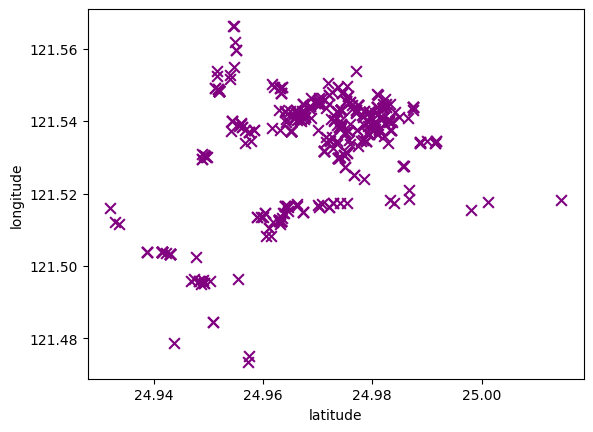

In [ ]:
# Визуализация местоположения недвижимости
plt.scatter(x=X, y=y, marker = "x", color = 'purple', s = 60)

plt.xlabel('latitude')
plt.ylabel('longitude')

plt.show()

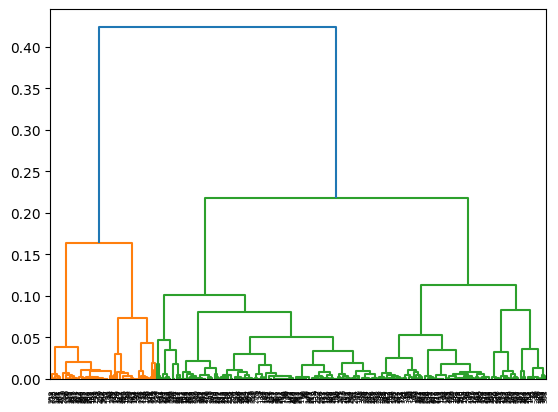

In [ ]:
linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

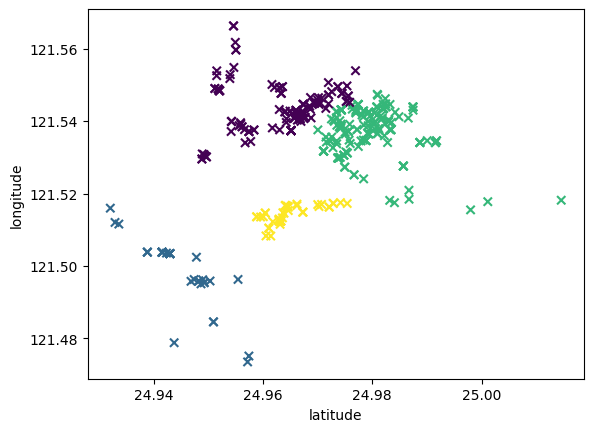

In [ ]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(X, y, c=labels, marker = "x")

plt.xlabel('latitude')
plt.ylabel('longitude')

plt.show()

In [ ]:
location = df.iloc[:, [3, 4]].values

In [ ]:
location

array([[ 24.98298, 121.54024],
       [ 24.98034, 121.53951],
       [ 24.98746, 121.54391],
       [ 24.98746, 121.54391],
       [ 24.97937, 121.54245],
       [ 24.96305, 121.51254],
       [ 24.97933, 121.53642],
       [ 24.98042, 121.54228],
       [ 24.95095, 121.48458],
       [ 24.96731, 121.51486],
       [ 24.97349, 121.53372],
       [ 24.97433, 121.5431 ],
       [ 24.96515, 121.53737],
       [ 24.96108, 121.51046],
       [ 24.99156, 121.53406],
       [ 24.9824 , 121.54619],
       [ 24.97744, 121.54458],
       [ 24.97544, 121.53119],
       [ 24.9675 , 121.54451],
       [ 24.96772, 121.54102],
       [ 24.96314, 121.51151],
       [ 24.97528, 121.54541],
       [ 24.95204, 121.54842],
       [ 24.97528, 121.54541],
       [ 24.97353, 121.53885],
       [ 24.97542, 121.51726],
       [ 24.98085, 121.54391],
       [ 24.95593, 121.53913],
       [ 24.97419, 121.53797],
       [ 24.97563, 121.54694],
       [ 24.94826, 121.49587],
       [ 24.98281, 121.53408],
       [

In [ ]:
labels

array([2, 2, 2, 2, 2, 3, 2, 2, 1, 3, 2, 2, 0, 3, 2, 2, 2, 2, 0, 0, 3, 0,
       0, 0, 2, 3, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 3, 0, 0, 2, 1, 1, 0, 2,
       0, 0, 0, 2, 1, 1, 2, 0, 3, 0, 2, 0, 2, 0, 1, 0, 3, 0, 3, 0, 0, 2,
       0, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 3, 2, 0, 0, 0, 0, 3, 0, 0, 0, 1,
       2, 1, 2, 2, 3, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 3,
       0, 2, 3, 0, 2, 2, 1, 1, 3, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 3,
       2, 2, 0, 0, 2, 0, 2, 0, 2, 3, 0, 0, 0, 0, 2, 0, 1, 2, 0, 2, 0, 0,
       1, 1, 0, 2, 2, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 3, 1, 0, 3, 3, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 0,
       0, 0, 0, 2, 2, 2, 0, 3, 2, 2, 0, 2, 2, 2, 2, 2, 3, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 1, 2, 2, 0, 3, 1, 1, 2, 3, 0, 2, 2, 2, 0, 3, 0, 3,
       2, 3, 0, 0, 0, 0, 1, 2, 0, 2, 3, 2, 1, 2, 2, 2, 0, 3, 3, 2, 3, 0,
       2, 3, 2, 2, 0, 0, 0, 2, 2, 0, 0, 3, 0, 3, 0, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 0, 0, 0, 2, 3, 2, 0, 1, 2, 0, 2, 3,

In [ ]:
X

In [ ]:
y

In [ ]:
# Задача: определить, как цена на недвижимость зависит от расстояния до ближайшей станции метро

# Подготовка набора данных
X_label_tree = "distance to the nearest MRT station"

X_tree = df[X_label_tree]
y_tree = df[Y_label]

# Делим датасет на обучающий и тестовый наборы
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(
    X_tree,
    y_tree,
    test_size=0.3,
    random_state=101
)

X_train_tree = X_train_tree.to_numpy().reshape(-1, 1)
X_test_tree = X_test_tree.to_numpy().reshape(-1, 1)

y_train_tree = y_train_tree.to_numpy()
y_test_tree = y_test_tree.to_numpy()

In [ ]:
# Создание модели регрессора на основе дерева решений
decisionTree = DecisionTreeRegressor(random_state=1)

# Обучение модели на тренировочном наборе даных
decisionTree.fit(X_train_tree, y_train_tree)

In [ ]:
# Оценка точности предсказаний модели
decisionTree.score(X_test_tree, y_test_tree)

In [ ]:
# Предсказание цены на недвижимость по числу лет недвижимости
y_pred_tree = decisionTree.predict(X_test_tree)

# Вывод 10-ти предсказанных цен
pd.DataFrame({'Test': y_test_tree,'Pred':y_pred_tree }).head(10)

In [ ]:
y_pred_tree = decisionTree.predict(X_test_tree)

# Вычисляем ошибку
MAE  = metrics.mean_absolute_error(y_test_tree, y_pred_tree)
MSE  = metrics.mean_squared_error(y_test_tree, y_pred_tree)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

In [ ]:
plt.scatter(y_test_tree, y_pred_tree, color='#8541EB', label='Предсказанные значения')

plt.plot([min(y_test_tree), max(y_test_tree)], [min(y_test_tree), max(y_test_tree)], color='red', label='Линия наилучшего соответствия')

plt.xlabel('Y Test')
plt.ylabel('Y Pred')
plt.legend()

plt.show()

In [ ]:
x_ax = range(len(y_test_tree))
plt.plot(x_ax, y_test_tree, label="Тестовые значения")
plt.plot(x_ax, y_pred_tree, label="Предсказанные значения")
plt.title("Тестовые и предсказанные значения")

plt.xlabel('X')
plt.ylabel('Y')

plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
X_grid = np.arange(min(X_tree), max(X_tree), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, y, color = 'red')

plt.plot(X_grid, decisionTree.predict(X_grid), color = 'blue')

plt.title('Соотношения расстояния к стоимости недвижимости (Decision Tree Regression)')
plt.xlabel('Расстояние до станции метро')
plt.ylabel('Стоимость недвижимости')

plt.show()

In [ ]:
# Импортируем graphviz
from sklearn.tree import export_graphviz

export_graphviz(decisionTree, out_file ='tree.dot',
               feature_names=['House prices'])

In [ ]:
!dot -Tps /content/tree.dot -o /content/out_tree.ps

In [ ]:
from graphviz import Source
from sklearn import tree

Source(tree.export_graphviz(decisionTree, out_file=None, feature_names=['House prices']))

In [ ]:
from IPython.display import SVG
from graphviz import Source
from sklearn import tree

graph = Source(tree.export_graphviz(decisionTree, out_file=None, feature_names=['House prices']))
graph.format = 'png'
graph.render('dtree_render',view=True)

NameError: name 'decisionTree' is not defined

# Наивный байесовский классификатор

---



In [ ]:
# Координаты недвижимости из исходного набора данных
location = df.iloc[:, [3, 4]].values
location[0: 20]

array([[ 24.98298, 121.54024],
       [ 24.98034, 121.53951],
       [ 24.98746, 121.54391],
       [ 24.98746, 121.54391],
       [ 24.97937, 121.54245],
       [ 24.96305, 121.51254],
       [ 24.97933, 121.53642],
       [ 24.98042, 121.54228],
       [ 24.95095, 121.48458],
       [ 24.96731, 121.51486],
       [ 24.97349, 121.53372],
       [ 24.97433, 121.5431 ],
       [ 24.96515, 121.53737],
       [ 24.96108, 121.51046],
       [ 24.99156, 121.53406],
       [ 24.9824 , 121.54619],
       [ 24.97744, 121.54458],
       [ 24.97544, 121.53119],
       [ 24.9675 , 121.54451],
       [ 24.96772, 121.54102]])

In [ ]:
# Классы, выявленные при решении задачи методом иерархической кластеризации
labels[0:20]

array([2, 2, 2, 2, 2, 3, 2, 2, 1, 3, 2, 2, 0, 3, 2, 2, 2, 2, 0, 0])

In [ ]:
location = df.iloc[:, [3, 4]].values

X_train, X_test, y_train, y_test = train_test_split(
    location,
    labels,
    test_size=0.3,
    random_state=101
)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

In [ ]:
# Определение модели байесовского классификатора
sk_nb_clf = GaussianNB()
# Обучение байесовского классификатора на тренировочной выборке
sk_nb_clf.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Предсказание данных по тестовому набору
sk_nb_clf_pred_res = sk_nb_clf.predict(X_test)
# Оценка точности классификации
sk_nb_clf_accuracy = accuracy_score(y_test, sk_nb_clf_pred_res)
print(f'Оценка точности наивного байесовского классификатора: {sk_nb_clf_accuracy}')

Оценка точности наивного байесовского классификатора: 0.9838709677419355


In [ ]:
# Вычисляем ошибку
MAE  = metrics.mean_absolute_error(y_test, sk_nb_clf_pred_res)
MSE  = metrics.mean_squared_error(y_test, sk_nb_clf_pred_res)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,0.032258
MSE,0.064516
RMSE,0.254000


sk Naive Bayes classifier accucacy: 0.9838709677419355
[2 0 0 0 2 2 0 0 2 2 2 1 3 2 2 2 2 3 2 0 0 3 2 0 3 0 1 2 2 2 0 2 2 0 1 2 2
 3 1 2 0 1 3 2 2 3 0 1 1 2 2 1 2 1 0 0 0 3 2 2 2 2 0 2 2 2 0 2 3 0 0 2 2 2
 2 0 0 1 2 1 0 2 0 3 0 1 3 2 2 1 0 0 0 3 0 0 3 0 2 2 2 2 2 2 0 2 2 3 0 0 2
 0 1 3 2 0 2 2 2 2 2 2 3 1]
[0, 1]


/usr/local/lib/python3.11/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


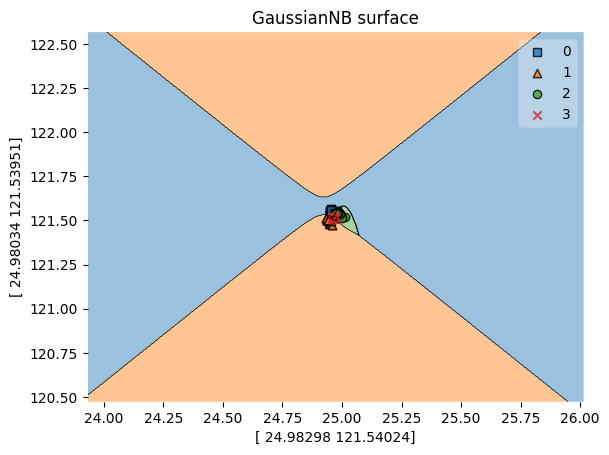

In [ ]:
sk_nb_clf = GaussianNB()
sk_nb_clf.fit(X_train, y_train)
sk_nb_clf_pred_res = sk_nb_clf.predict(X_test)
sk_nb_clf_accuracy = accuracy_score(y_test, sk_nb_clf_pred_res)

print(f'sk Naive Bayes classifier accucacy: {sk_nb_clf_accuracy}')
print(sk_nb_clf_pred_res)

feature_indexes = [0, 1]
title1 = 'GaussianNB surface'
decision_boundary_plot(location, labels, X_train, y_train, sk_nb_clf, feature_indexes, title1)

In [ ]:
X1, y1 = load_iris(return_X_y=True, as_frame=True)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1.values, y1.values, random_state=0)


In [ ]:
X1_train[0:10]

array([[5.9, 3. , 4.2, 1.5],
       [5.8, 2.6, 4. , 1.2],
       [6.8, 3. , 5.5, 2.1],
       [4.7, 3.2, 1.3, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [5. , 3.5, 1.6, 0.6],
       [5.4, 3.7, 1.5, 0.2],
       [5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5]])

In [ ]:
X1_test[0:10]

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2],
       [6.3, 3.3, 6. , 2.5],
       [5. , 3.5, 1.3, 0.3],
       [6.7, 3.1, 4.7, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [6.1, 2.8, 4. , 1.3]])

In [ ]:
y1_train[0:10]

array([1, 1, 2, 0, 2, 0, 0, 1, 2, 2])

In [ ]:
y1_test[0:10]

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

In [ ]:

Y_label = "house price of unit area"
X_label = "number of convenience stores"

X = df[X_label]
y = df[Y_label]

In [ ]:
from scipy.stats import norm

# Делим датасет на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=101
)

X_train = X_train.to_numpy()

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 411 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   house age                            411 non-null    float64
 1   distance to the nearest MRT station  411 non-null    float64
 2   number of convenience stores         411 non-null    int64  
 3   latitude                             411 non-null    float64
 4   longitude                            411 non-null    float64
 5   house price of unit area             411 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 22.5 KB


In [ ]:
X_train[0:10]

array([ 4,  7,  0, 10,  9,  3,  5,  0,  5,  6])

In [ ]:
y_train[0:10]

array([[ 4],
       [ 7],
       [ 0],
       [10],
       [ 9],
       [ 3],
       [ 5],
       [ 0],
       [ 5],
       [ 6]])

In [ ]:
means = X_train.groupby(y_train).apply(np.mean)
stds = X_train.groupby(y_train).apply(np.std)

### Вычисляем априорную вероятность класса
probs = X_train.groupby(y_train).apply(lambda x: len(x)) / X_train.shape[0]

print(probs)

### Вычисляем вероятность для Теоремы Байеса для каждого элемента
y_pred = []
# каждый элемент в валидационной части данных
for elem in range(X_test.shape[0]):
   p = {}

   # для каждого возможного класса
   for cl in np.unique(y_train):

       # априорная вероятность взятого ранее класса
       p[cl] = probs.iloc[cl]

       # для каждого столбца в датасете
       for index, param in enumerate(X_test.iloc[elem]):

           # умножаем вероятность того, что данное значение столбца
           # будет принадлежать распределению для выбранного класса
           p[cl] *= norm.pdf(param, means.iloc[cl, index], stds.iloc[cl, index])

   y_pred.append(pd.Series(p).values.argmax())

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
accuracy2 = accuracy_score(y_val, model.predict(X_val))

print(accuracy2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [ ]:
# Задача: определить группы недвижимости по разности координат

# Получение информации о местоположении недвижимости
location = df.iloc[:, [5, 6]].values

In [ ]:
location

array([[ 24.98298, 121.54024],
       [ 24.98034, 121.53951],
       [ 24.98746, 121.54391],
       [ 24.98746, 121.54391],
       [ 24.97937, 121.54245],
       [ 24.96305, 121.51254],
       [ 24.97933, 121.53642],
       [ 24.98042, 121.54228],
       [ 24.95095, 121.48458],
       [ 24.96731, 121.51486],
       [ 24.97349, 121.53372],
       [ 24.97433, 121.5431 ],
       [ 24.96515, 121.53737],
       [ 24.96108, 121.51046],
       [ 24.99156, 121.53406],
       [ 24.9824 , 121.54619],
       [ 24.97744, 121.54458],
       [ 24.97544, 121.53119],
       [ 24.9675 , 121.54451],
       [ 24.96772, 121.54102],
       [ 24.96314, 121.51151],
       [ 24.97528, 121.54541],
       [ 24.95204, 121.54842],
       [ 24.97528, 121.54541],
       [ 24.97353, 121.53885],
       [ 24.97542, 121.51726],
       [ 24.98085, 121.54391],
       [ 24.95593, 121.53913],
       [ 24.97419, 121.53797],
       [ 24.97563, 121.54694],
       [ 24.94826, 121.49587],
       [ 24.98281, 121.53408],
       [

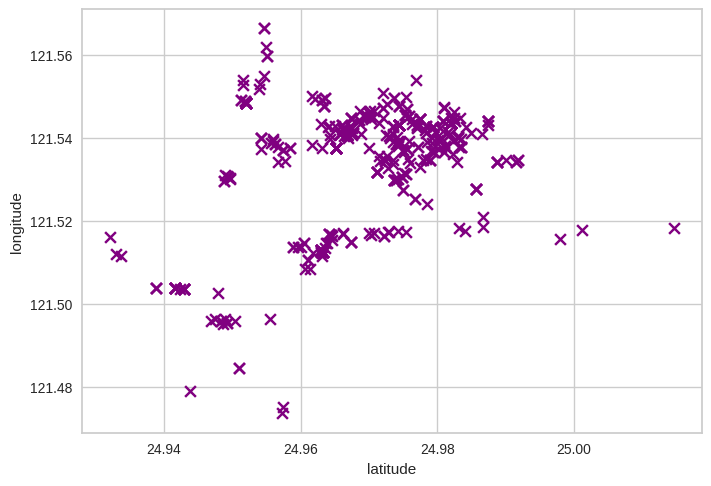

In [ ]:
# Визуализация местоположения недвижимости
plt.scatter(location[:,0], location[:,1], marker = "x", color = 'purple', s = 60)

plt.xlabel('latitude')
plt.ylabel('longitude')

plt.show()

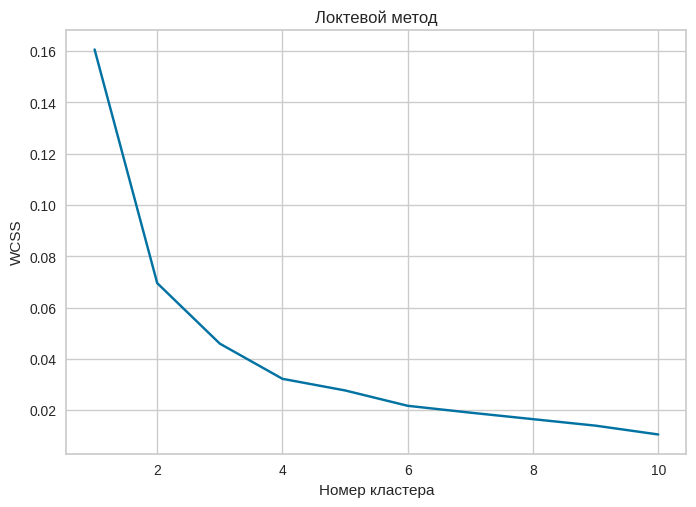

In [ ]:
# Поиск оптимального числа кластеров с помощью локтевого метода
from sklearn.cluster import KMeans

wcss = []
target_range = range(1, 11)

for i in target_range:
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=0)
  kmeans.fit(location)
  wcss.append(kmeans.inertia_)

plt.plot(target_range, wcss)
plt.title('Локтевой метод')

plt.xlabel('Номер кластера')
plt.ylabel('WCSS')

plt.savefig('number_of_clusters.png')
plt.show()

In [ ]:
# Создадим модель для KMeans
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)

# Получение предсказаний того, к какому кластеру относится отдельная пара координат (lat; lng)
y_kmeans = kmeans.fit_predict(location)

y_kmeans

array([2, 2, 2, 2, 2, 3, 2, 2, 0, 3, 2, 2, 1, 3, 2, 2, 2, 2, 1, 1, 3, 2,
       1, 2, 2, 3, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 3, 1, 2, 2, 0, 0, 1, 2,
       2, 1, 1, 2, 0, 0, 2, 1, 3, 1, 2, 1, 2, 1, 0, 1, 3, 2, 3, 2, 1, 2,
       1, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2, 3, 2, 1, 2, 1, 1, 3, 1, 1, 1, 0,
       2, 0, 2, 2, 3, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 3,
       1, 2, 3, 1, 2, 2, 0, 0, 3, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 3,
       2, 2, 1, 1, 2, 1, 2, 1, 2, 3, 1, 1, 1, 2, 2, 1, 0, 2, 1, 2, 1, 1,
       0, 0, 1, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 3, 0, 1, 3, 3, 1, 2, 0, 2, 2, 1, 2, 0, 1, 2, 1,
       1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 0, 2, 2, 1, 3, 0, 0, 2, 3, 1, 2, 2, 2, 1, 3, 1, 3,
       2, 3, 2, 1, 1, 1, 0, 2, 1, 2, 3, 2, 0, 2, 2, 2, 1, 3, 3, 2, 3, 1,
       2, 3, 2, 2, 1, 1, 1, 2, 2, 1, 1, 3, 1, 3, 1, 2, 1, 3, 1, 2, 2, 1,
       2, 2, 2, 1, 1, 1, 2, 3, 2, 1, 0, 2, 1, 2, 3,

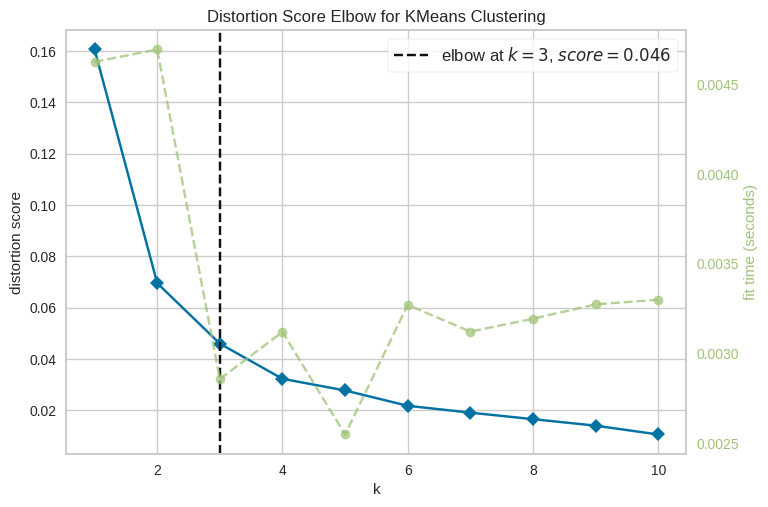

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(kmeans, k = (1, 11))
visualizer.fit(location)
visualizer.show()

<ipython-input-139-ea9402fbe6c6>:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(location[y_kmeans == i, 0], location[y_kmeans == i, 1], s= 60, c = colors(i), marker = "x")


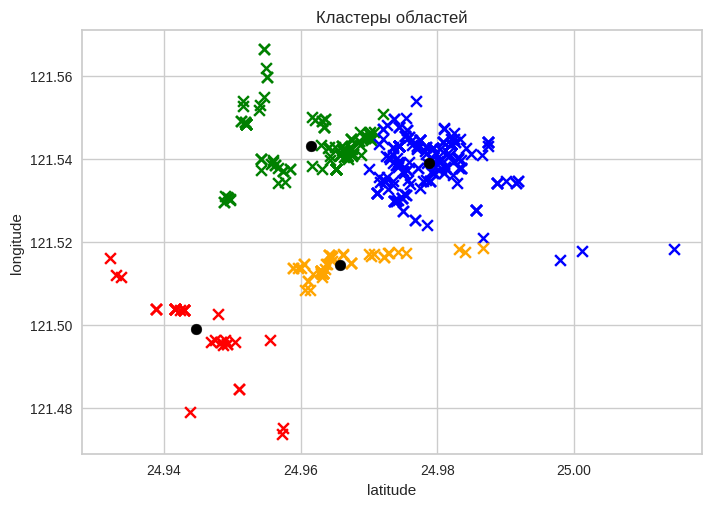

In [ ]:
from matplotlib.colors import ListedColormap

raw_colors = ("red", "green", "blue", "orange")
colors = ListedColormap(raw_colors)

for i in range(5):
  plt.scatter(location[y_kmeans == i, 0], location[y_kmeans == i, 1], s= 60, c = colors(i), marker = "x")


X_clusters = kmeans.cluster_centers_[:, 0]
Y_clusters = kmeans.cluster_centers_[:, 1]

plt.scatter(X_clusters, Y_clusters, s= 60, c= "black")

plt.title('Кластеры областей')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

In [ ]:
area = y_kmeans
df_new = df.copy()

df_new["unit area"] = area
df_new

location_map = df_new[['latitude','longitude','unit area']]

def getColorByArea(area):
  if area == 0:
    return "red"
  elif area == 1:
    return "green"
  elif area == 2:
    return "blue"
  else:
    return "orange"

location_map['color'] = location_map['unit area'].apply(getColorByArea)
location_map['size']  = location_map['unit area'].apply(lambda area: 6)

<ipython-input-140-962e52fbe098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_map['color'] = location_map['unit area'].apply(getColorByArea)
<ipython-input-140-962e52fbe098>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_map['size']  = location_map['unit area'].apply(lambda area: 6)


In [ ]:
import folium

# Рисование карты
map = folium.Map(location_map = [24.968, 121.53], zoom_start = 13)

zip_res = zip(location_map['latitude'], location_map['longitude'], location_map['unit area'], location_map['color'], location_map['size'])

# Рисование маркеров, соответствующих элементам недвижимости распределённым по группам
for lat,lon,price,color,size in zip_res:
  folium.CircleMarker([lat, lon],
                      popup=price,
                      radius=size,
                      color='b',
                      fill=True,
                      fill_opacity=0.7,
                      fill_color=color,
  ).add_to(map)

map

# Метод опорных векторов (SVR)

In [ ]:
# Подключение необходимых библиотек
from sklearn.svm import SVR

In [ ]:
# Задача: определить, как цена на недвижимость зависит от расстояния до ближайшей станции метро

# Подготовка набора данных
X_label_svr = "distance to the nearest MRT station"

X_svr = df[X_label_svr]
y_svr = df[Y_label]

# Делим датасет на обучающий и тестовый наборы
X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(
    X_svr,
    y_svr,
    test_size=0.3,
    random_state=101
)

X_train_svr = X_train_svr.to_numpy().reshape(-1, 1)
X_test_svr = X_test_svr.to_numpy().reshape(-1, 1)

y_train_svr = y_train_svr.to_numpy()
y_test_svr = y_test_svr.to_numpy()

In [ ]:
modelSVR = SVR()
modelSVR.fit(X_train_svr, y_train_svr)

SVR()

In [ ]:
# Оценка точности предсказаний модели
modelSVR.score(X_test_svr, y_test_svr)

0.6298849415461867

In [ ]:
# Предсказание цены на недвижимость по числу лет недвижимости
y_pred_svr = modelSVR.predict(X_test_svr)

# Вывод 10-ти предсказанных цен
pd.DataFrame({'Test': y_test_svr,'Pred':y_pred_svr }).head(10)

,Test,Pred
0,36.5,42.252569
1,40.6,41.930997
2,39.1,45.760129
3,36.9,45.769492
4,35.3,42.664317
5,43.5,44.759506
6,30.5,43.368509
7,42.8,46.082232
8,51.0,44.599685
9,50.0,46.155075


In [ ]:
y_pred_svr = modelSVR.predict(X_test_svr)

# Вычисляем ошибку
MAE  = metrics.mean_absolute_error(y_test_svr, y_pred_svr)
MSE  = metrics.mean_squared_error(y_test_svr, y_pred_svr)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,5.762679
MSE,58.121454
RMSE,7.623743


In [ ]:
y_test_svr[5]

43.5

In [ ]:
modelSVR.predict([X_test_svr[5]])

array([44.75950607])

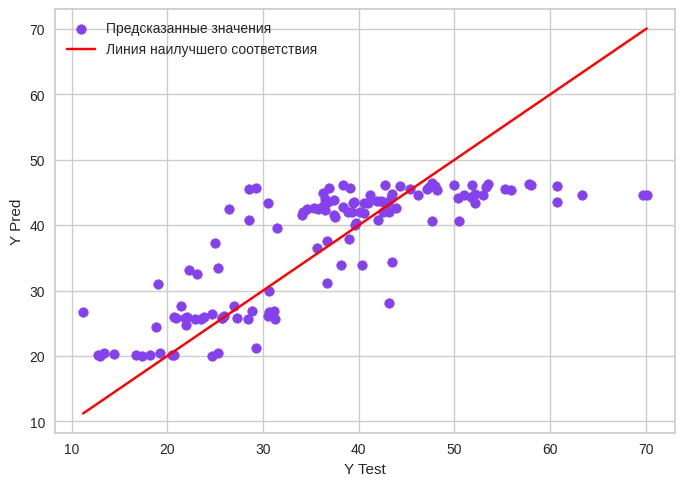

In [ ]:
plt.scatter(y_test_svr, y_pred_svr, color='#8541EB', label='Предсказанные значения')

plt.plot([min(y_test_svr), max(y_test_svr)], [min(y_test_svr), max(y_test_svr)], color='red', label='Линия наилучшего соответствия')

plt.xlabel('Y Test')
plt.ylabel('Y Pred')
plt.legend()

plt.show()

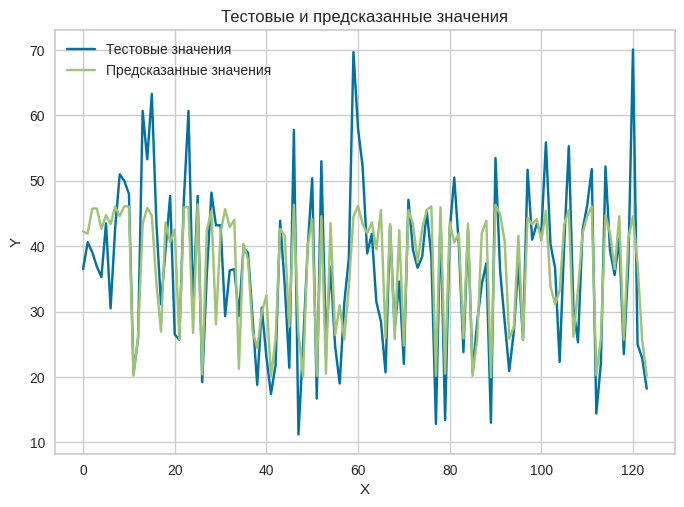

In [ ]:
x_ax_svr = range(len(y_test_svr))
plt.plot(x_ax_svr, y_test_svr, label="Тестовые значения")
plt.plot(x_ax_svr, y_pred_svr, label="Предсказанные значения")
plt.title("Тестовые и предсказанные значения")

plt.xlabel('X')
plt.ylabel('Y')

plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()